**Importing Libraries**

---




In [37]:
# !pip install graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
%matplotlib inline

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MyFlow/data_cleaned.csv")
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(891, 25)

In [ ]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
y = df["Survived"]
x = df.drop("Survived",axis=1)

**Split data into train and test**

---



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=101) #70%

In [ ]:
x_train.shape,y_train.shape #train shapes

((623, 24), (623,))

In [ ]:
x_train.shape,y_test.shape #test shapes

((623, 24), (268,))

**Applying Decision Tree Classifier**

---



In [ ]:
dt_model = DecisionTreeClassifier(max_depth=10,random_state=10)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [ ]:
dt_model.score(x_train,y_train)

0.92776886035313

In [ ]:
dt_model.score(x_test,y_test)

0.7238805970149254

**Making Predictions**

---



In [ ]:
predictedValues = dt_model.predict(x_test)

In [ ]:
y_pred = dt_model.predict_proba(x_test)[:,1]

In [ ]:
y_new = []
for i in range(len(y_pred)):
  if y_pred[i]<=0.5:
    y_new.append(0)
  else:
    y_new.append(1)

In [ ]:
accuracy_score(y_test, y_new)

0.7238805970149254

**Comparing train & test accuracy based on Depth**

---



In [ ]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
  dt_model.fit(x_train, y_train)
  train_accuracy.append(dt_model.score(x_train, y_train))
  test_accuracy.append(dt_model.score(x_test, y_test))

In [ ]:
frame = pd.DataFrame({'Depth':range(1,10), 'Train Accuracy':train_accuracy, 'Test Accuracy':test_accuracy})
frame.head()

,Depth,Train Accuracy,Test Accuracy
0,1,0.796148,0.764925
1,2,0.805778,0.772388
2,3,0.831461,0.787313
3,4,0.842697,0.794776
4,5,0.845907,0.779851


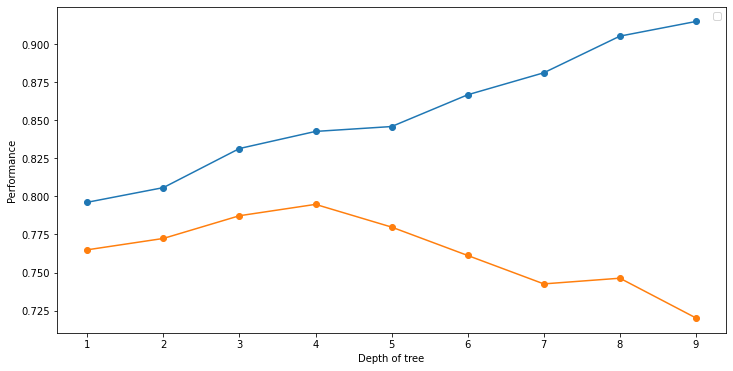

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['Depth'], frame['Train Accuracy'], marker='o')
plt.plot(frame['Depth'], frame['Test Accuracy'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

In [39]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=10)

In [40]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [41]:
#Training score
dt_model.score(x_train, y_train)

0.8426966292134831

In [42]:
#Validation score
dt_model.score(x_test, y_test)

0.7947761194029851

**Creating Decision Tree**

---



In [43]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=2,filled=True)

In [45]:
!dot -Tpng tree.dot -o tree.png

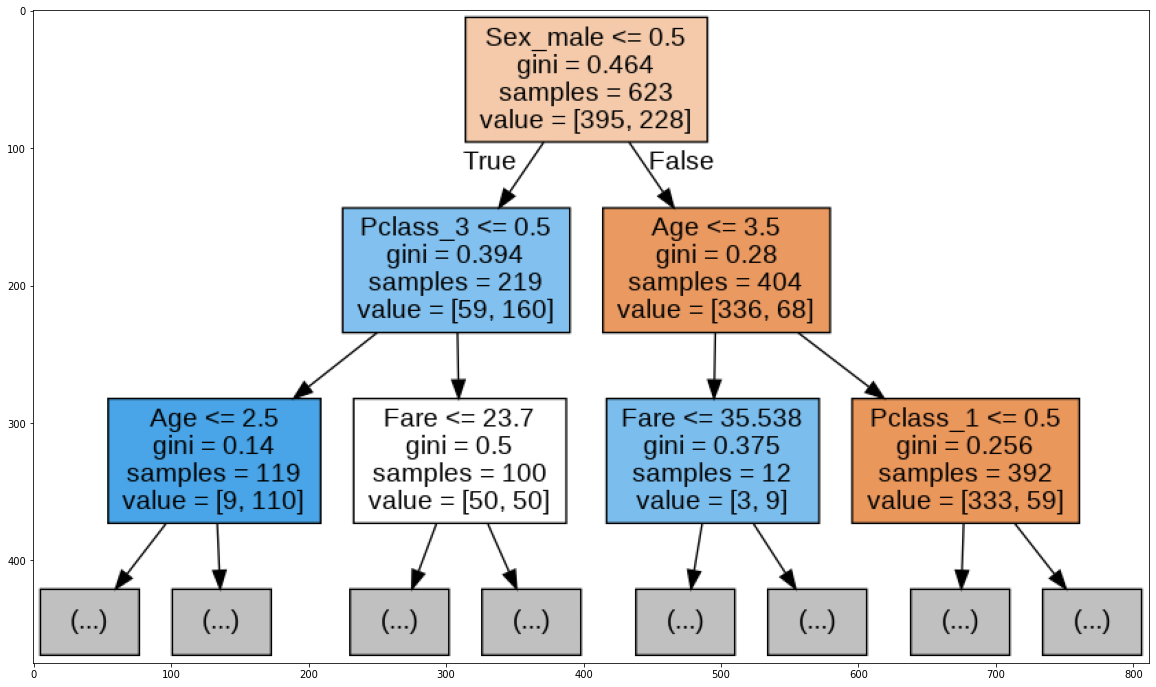

In [47]:
image = plt.imread('tree.png')
plt.figure(figsize=(20,20))
plt.imshow(image)